# Assignment 2

Classify the email using the binary classification method. Email Spam detection has two states: 
a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors , logistic regression classification, 
decision tree classification, Naive Bays classification, Random forest classification    and Support Vector Machine for 
classification. Analyze their performance



In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('emails.csv')
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
df.drop(columns=['Email No.'],inplace=True)

In [5]:
y = df['Prediction']
X = df.drop(columns=['Prediction'])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [7]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [8]:
# predict=knn.predict(X_test)
# print(knn.score(X_test,y_test))

In [9]:
r_mod = LogisticRegression()
r_mod.fit(X_train,y_train)
y_pred = r_mod.predict(X_test)
acc_sc = accuracy_score(y_test,y_pred)
print("Accuracy :",acc_sc)

Accuracy : 0.9768115942028985


C:\Users\01abn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
svm=SVC()
svm.fit(X_train,y_train)
predict=svm.predict(X_test)
predict_svm = accuracy_score(y_test,predict)
print("Accuracy :",accuracy_score(y_test,predict))

Accuracy : 0.7951690821256039


In [11]:
rfc=RandomForestClassifier(n_estimators=100,random_state=150)
rfc.fit(X_train,y_train)
predict=rfc.predict(X_test)
predict_rfc = accuracy_score(y_test,predict)
print("Accuracy :",accuracy_score(y_test,predict))

Accuracy : 0.9816425120772947


In [12]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predict=dtc.predict(X_test)
predict_dtc = accuracy_score(y_test,predict)
print("Accuracy :",accuracy_score(y_test,predict))

Accuracy : 0.9420289855072463


In [13]:
mnbc = MultinomialNB()
mnbc.fit(X_train,y_train)
predict=mnbc.predict(X_test)
predict_mnbc = accuracy_score(y_test,predict)
# mat = confusion_matrix(y_test,predict)
# print(mat)
print("Accuracy :",accuracy_score(y_test,predict))


Accuracy : 0.9458937198067633


# Result

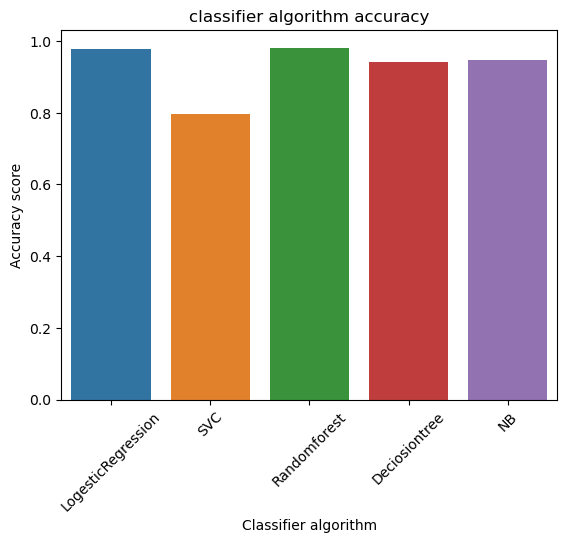

In [15]:
categorie = ["LogesticRegression","SVC","Randomforest","Deciosiontree","NB"]
values = [acc_sc,predict_svm,predict_rfc,predict_dtc,predict_mnbc]
sns.barplot(x = categorie,y=values)
plt.xlabel("Classifier algorithm")
plt.ylabel("Accuracy score")
plt.title("classifier algorithm accuracy")
plt.xticks(rotation=45)
plt.show()